In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Restricted Bolztman Machines

Assume a RBM with $n_i$ input neurons, $\mathbf{v} \in \mathbf{V} = [0,1]^{n_i}$, and $n_h$ hidden units, $\mathbf{h} \in \mathbf{H} = [0,1]^{n_h}$. Observe that inputs and hidden units are binary. In this small setup $|\mathbf{V}|=2^{n_i}$ and $|\mathbf{H}|=2^{n_h}$. Normally, $\mathbf{V}$ would have a very high dimension (images, etc.)


![alt text](./Images/rbm.png)

a probability function over vectors $\mathbf{h}$ and $\mathbf{v}$ is defined through an energy function  $E(\mathbf{v},\mathbf{h})$ as follows

$$E(\mathbf{v},\mathbf{h}) = - \mathbf{h}^T \mathbf{W} \mathbf{v} - \mathbf{c}^T\mathbf{v} - \mathbf{b}^T\mathbf{h}$$
$$p(\mathbf{v}, \mathbf{h}|\theta) = \frac{e^{-E(\mathbf{v}, \mathbf{h})}}{Z}$$

with:

- $\mathbf{W} \in \mathbb{R}^{n_h \times n_i}$, the weight matrix of connections between hidden and input neurons
- $\mathbf{c} \in \mathbb{R}^{n_i}$, the bias term for the input neurons
- $\mathbf{b} \in \mathbb{R}^{n_h}$, the bias term for the hidden neurons
- $\theta = [\mathbf{W}, \mathbf{c}, \mathbf{b}]$
- $Z = \sum_{\mathbf{v} \in \mathbf{V}, \mathbf{h} \in \mathbf{H}} e^{-E(\mathbf{v},\mathbf{h})}$, normalization term usualy intractable to compute (in this very small setup we will still be able to compute it).

by marginalising over $\mathbf{h}$ we get:

$$p(\mathbf{v}|\theta) =  \sum_{\mathbf{h}\in \mathbf{H}} p(\mathbf{v}, \mathbf{h}|\theta) =  \sum_{\mathbf{h}\in \mathbf{H}} \frac{e^{-E(\mathbf{v}, \mathbf{h})}}{Z} = \frac{e^{-\mathcal{F}(\mathbf{v})}}{Z}$$


where $\mathcal{F}$ is the **free energy** for an input vector, and it is defined as


$$\mathcal{F}(\mathbf{v}) = -\Bigg[\mathbf{c}^T \mathbf{v} + \sum_{j} log(1+e^{b_j+\mathbf{W}_j\mathbf{v}})\Bigg]$$ 

note that, $j \in [0,..,dim(H)-1]$, **surprisingly**, this ends up being a summatory over the number of hidden units.

Therefore, 

$$p(\mathbf{v}|\theta) \propto e^{-\mathcal{F}(\mathbf{v})}$$

### Given a set of training data $\mathbf{V}_{tr} \subset \mathbf{V}$, we want to obtain $\theta = [\mathbf{W}, \mathbf{c}, \mathbf{b]}$ so that the probability of the training set is as large as possible $\rightarrow$ the free energy of the train data is as low as possible.


See here for larger examples with TensorFlow: https://github.com/monsta-hd/boltzmann-machines

## Example


Assume a RBM with $4$ input neurons, $\mathbf{v} \in \mathbf{V} = [0,1]^6$, and $3$ hidden units, $\mathbf{h} \in \mathbf{H} = [0,1]^{5}$.

In [2]:
import itertools

dim_V = 6
dim_H = 5

X_domain = np.r_[[i for i in itertools.product([0,1], repeat=dim_V)]]
print "All possible input values"
print X_domain

All possible input values
[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 1]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 0 1 0 1 0]
 [1 0 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 1 1 0 1]
 [1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 1]
 [1 1 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]


In [3]:
def free_energy(v,c,b,W):
    v = v.reshape(-1, v.shape[-1])
    return - v.dot(c)- np.logaddexp(0, v.dot(W.T) + b).sum(axis=1) 

In [9]:
def plot_free_energy(X_domain, X_train, c,b,W):
    plt.figure(figsize=(20,3))
    energies = free_energy(X_domain, c, b ,W)
    plt.bar(range(len(energies)), energies, 0.4, label="full domain", alpha=.5)
    plt.xticks(range(len(X_domain)), [str(i) for i in X_domain], rotation="vertical");

    X_idxs = np.r_[[np.sum(i == X_domain, axis=1)==X_domain.shape[1] for i in X_train]].T.sum(axis=1).astype(bool)

    plt.bar(np.arange(len(X_domain))[X_idxs], energies[X_idxs], .9, label="train data")
    plt.ylabel("free energy")
    plt.legend();

### we create a random (not trained) set of weights and biases for our RBM

In [10]:
rc = np.random.normal(size=dim_V)
rb = np.random.normal(size=dim_H)
rW = np.random.normal(size=(dim_H,dim_V))

### and select a set of training data that <font color="red">contain some pattern<font>

for instance that they are consecutive

In [16]:
k = np.random.randint(len(X_domain)-10)
X_train = X_domain[k:k+10]
X_rest  = np.r_[[i for i in X_domain if np.sum([np.allclose(i,j) for j in X_train])==0]]
X_train          

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 0]])

In [17]:
len(X_rest), len(X_train)

(54, 10)

### observe the free energy assigned by the randowm weights to our data

including the train data just selected

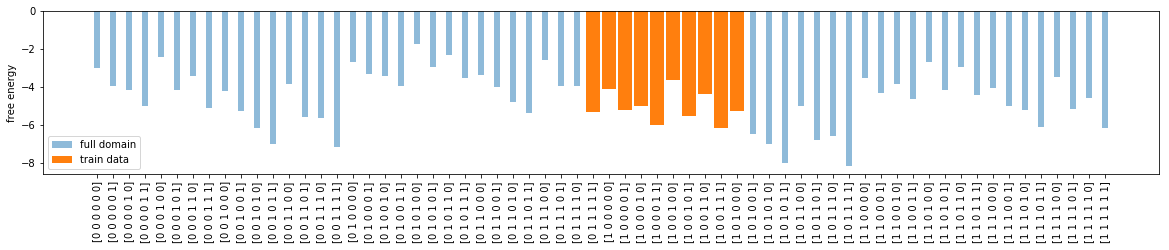

In [18]:
plot_free_energy(X_domain, X_train, rc, rb, rW)

### observe how, after training, our training data has less energy (more probability)

$\Rightarrow$ the training process has created a probability distribution where our training data is more probable than the rest

$\Rightarrow$ additionally, pdata elements with atterns similar to training data (although not part of the selected train set) also receive large probability. The RBM is **generalizing**.



In [19]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.01,n_iter=1000, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_

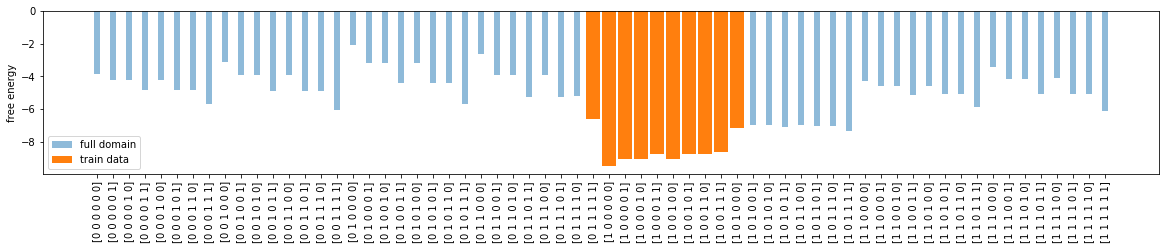

In [20]:
plot_free_energy(X_domain, X_train, c, b, W)

### Given a set of RBM params we measure the ratio between the free energy of train data and the rest


$$r\mathcal{F} = \frac{\mathcal{F}(\mathbf{X_{train}})}{\mathcal{F}(\mathbf{X_{rest}})} $$

where $\mathbf{v} \in \mathbf{X_{rest}}$ **iff** $\mathbf{v} \notin \mathbf{X_{train}}$

In [21]:
def rF(X_train, X_rest, c,b,W):
    return np.mean(free_energy(X_train, c, b, W)) / np.mean(free_energy(X_rest, c, b, W))

observe how $r\mathcal{F}$ increases after training quantifying what we just illustrated graphically

In [22]:
print "rF (random params)  = %.3f"%rF(X_train, X_rest, rc, rb, rW)
print "rF (after training) = %.3f"%rF(X_train, X_rest, c, b, W)

rF (random params)  = 1.110
rF (after training) = 1.779


### observe what happens if our training data does not contain any noticeable pattern

we select it randombly

In [23]:
X_train = np.random.permutation(X_domain)[:10]
X_rest  = np.r_[[i for i in X_domain if np.sum([np.allclose(i,j) for j in X_train])==0]]
X_train          

array([[1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

**energy with random parameters**

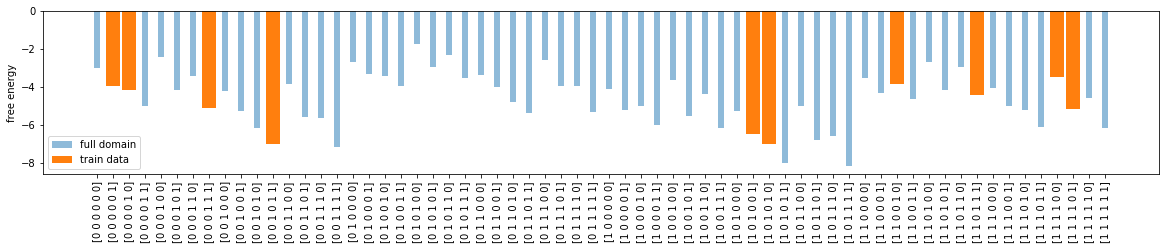

In [24]:
plot_free_energy(X_domain, X_train, rc, rb, rW)

**energy after training**

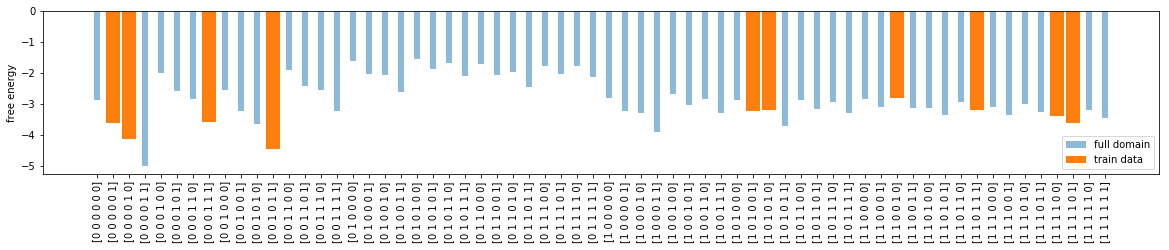

In [25]:
rbm = BernoulliRBM(n_components=3, batch_size=1, learning_rate=.01,n_iter=1000, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

**free enery ratio**

In [26]:
print "rF (random params)  = %.3f"%rF(X_train, X_rest, rc, rb, rW)
print "rF (after training) = %.3f"%rF(X_train, X_rest, c, b, W)

rF (random params)  = 1.110
rF (after training) = 1.287


### the RBM still tries to make training data more probable!!! (less free energy)


## Let's go back to the pattern example

We now build patterns with the modulus operator, observe that with prime modulus (i.e `pattern_modulus=7` ) the RBM has a hard time obtaining a disitribution that separates the training data. Play with RBM params (`n_iter, learning_rate, n_components, batch_size`)

In [27]:
dim_H = 2

pattern_modulus = 7

X_train = X_domain[[np.sum(i*(2**np.arange(len(i))[::-1]))%pattern_modulus==0 for i in X_domain]]

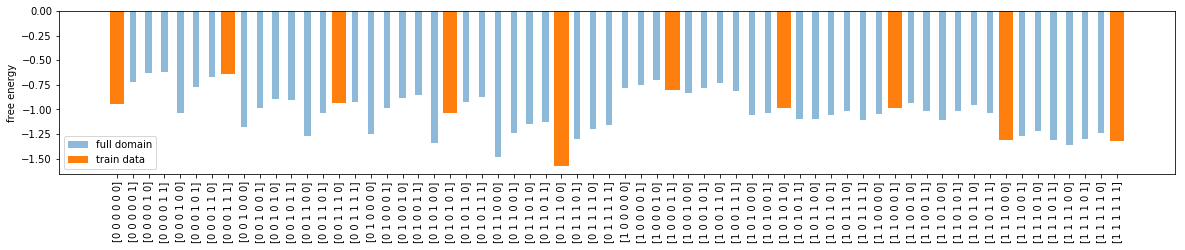

In [28]:
rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

however, with powers of two, the RBM easily builds the distribution.

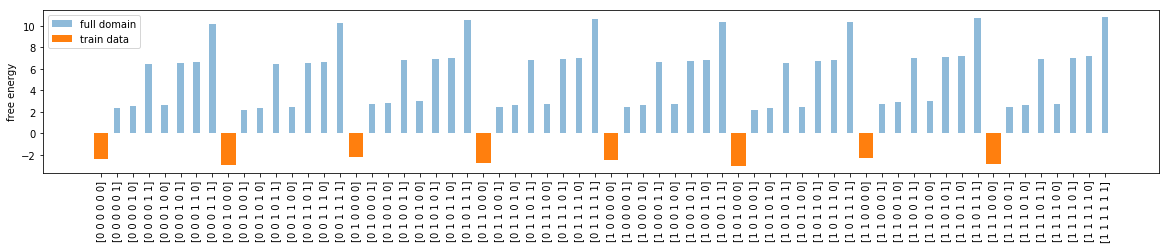

In [29]:
pattern_modulus = 8
pattern_shift   = 0
X_train = X_domain[[np.sum(i*(2**np.arange(len(i))[::-1]))%pattern_modulus==pattern_shift for i in X_domain]]

rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

### we can sample from the distribution created for different values of H

We are now **generating input data!!!**. For instance, when h=[0,0], we are asking the RBM: _generate input vectors sampling from the learnt distribution when h=[0,0]_, this is, sample from:

$$P(v|h=[0,0])$$


In the code below, for each value of $h$ we generate 100 input samples and show the average number of times each input neuron was activated across the samples generated.

Observe the distributions of the active neurons of the inputs generated.

- with `pattern_modulus = 8`, `pattern_shift = 0`, the input patterns emerging is `[1,1,1,0,0,0]`
- with `pattern_modulus = 8`, `pattern_shift = 1`, the input patterns emerging is `[1,1,1,0,0,1]`
- with `pattern_modulus = 8`, `pattern_shift = 2`, the input patterns emerging is `[1,1,1,0,1,0]`
- with `pattern_modulus = 16`, `pattern_shift = 2`, the input patterns emerging is `[1,1,0,0,1,0]`



In [30]:
def plot_h_distrib(rbm, h):
    k = rbm._sample_visibles(np.r_[[h]*100], np.random.RandomState(np.random.randint(100))).mean(axis=0)
    plt.bar(range(len(k)), k)
    plt.xlabel("activation for input neurons")
    plt.ylabel("probability, $P(v|h)$")
    plt.title("hidden patern h=%s"%(str(h)))

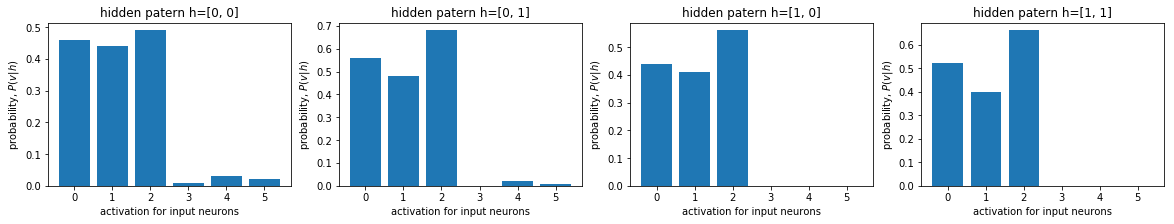

In [31]:
plt.figure(figsize=(20,3))
for i, h in enumerate([[0,0], [0,1], [1,0], [1,1]]):
    plt.subplot(1,4,i+1)
    plot_h_distrib(rbm, h)
